In [1]:
import numpy as np

In [2]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.


In [8]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import vis

In [24]:
vis.fashion_mnist_label()

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [25]:
vis.imshow(x_train[0])

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


2


(<matplotlib.image.AxesImage at 0x7fc5b5653518>, None)

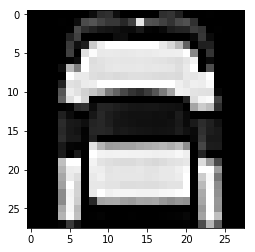

In [29]:
number = 125
plt.imshow(x_train[number],cmap="gray"), print(y_train[number])

In [30]:
y_train[100]

8

In [31]:
x_train_conv = x_train.reshape(x_train.shape[0],28,28,1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train_conv.shape, x_test_conv.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# categorical data

In [32]:
from keras.utils import to_categorical

In [33]:
y_train_class = to_categorical(y_train,10)
y_test_class = to_categorical(y_test, 10)

In [34]:
y_train_class.shape, y_test_class.shape

((60000, 10), (10000, 10))

# CNN Model

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [36]:
cnn = Sequential()

In [37]:
cnn.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)))

In [38]:
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(64, kernel_size=(3,3), activation="relu"))

In [39]:
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Flatten())


In [40]:
cnn.add(Dense(128, activation="relu"))

In [41]:
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))

In [42]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
__________

In [43]:
cnn.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [44]:
output_cnn = cnn.fit(x_train_conv, y_train_class, batch_size=128, epochs=10, validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 159s 3ms/step - loss: 14.4618 - acc: 0.1025 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/10
60000/60000 [==============================] - 159s 3ms/step - loss: 14.1771 - acc: 0.1203 - val_loss: 14.5047 - val_acc: 0.1001
Epoch 3/10
60000/60000 [==============================] - 162s 3ms/step - loss: 14.1260 - acc: 0.1236 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/10
60000/60000 [==============================] - 155s 3ms/step - loss: 14.4464 - acc: 0.1037 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/10
60000/60000 [==============================] - 157s 3ms/step - loss: 14.4507 - acc: 0.1035 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/10
60000/60000 [==============================] - 154s 3ms/step - loss: 14.4448 - acc: 0.1038 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/10
60000/60000 [==============================] - 121s 2ms/step - loss: 14.4426 - acc: 0.1040 - val_lo

# lets predict

In [46]:
y_pred= cnn.predict_classes(x_test_conv)

In [47]:
y_pred.shape

(10000,)

In [55]:
x_temp= x_test[2]

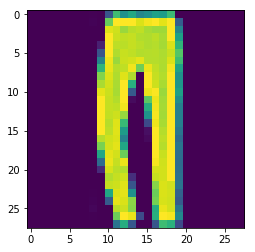

In [56]:
plt.imshow(x_temp)

In [60]:
y_pred[2]

5

In [59]:
i_i = np.nonzero(y_pred != y_orig)[0]

NameError: name 'y_orig' is not defined